In [1]:
import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import matplotlib as mpl
# enables correct plotting of text
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42 

In [2]:
# import deprecated
# import session_info
# session_info.show()

In [3]:
import importlib.util
import sys
spec = importlib.util.spec_from_file_location("module.name", "/nfs/team205/kk18/function/python/tissueaxis.py")
tissueaxis = importlib.util.module_from_spec(spec)
sys.modules["module.name"] = tissueaxis
spec.loader.exec_module(tissueaxis)

In [4]:
sc.settings.set_figure_params(dpi=120)

# Variables

In [5]:
adata_dir = '/lustre/scratch126/cellgen/team205/kk18/VisiumHD/objects'
sample_id = 'HEA_FOET14880396'

In [6]:
figdir = '/nfs/team205/heart/fetal_ms_figures/raw_plots_kk/Aug2024'
table_dir = '/nfs/team205/heart/fetal_ms_figures/tables/Aug2024'

# Read in data

bin2cell output which has celltypist output as well

In [7]:
# read in 
adata = sc.read_h5ad(f'{adata_dir}/{sample_id}_b2c_cells_filtered_lognorm.h5ad')
adata

AnnData object with n_obs × n_vars = 129803 × 18047
    obs: 'object_id', 'bin_count', 'array_row', 'array_col', 'labels_joint_source', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'celltypist_coarse', 'conf_score_coarse', 'celltypist_coarse_fin', 'celltypist_coarse2midmod', 'conf_score_coarse2midmod', 'celltypist_mid_fin', 'celltypist_midmod2fine', 'conf_score_midmod2fine', 'fine_grain_4Jan2025', 'HistologicalAnnotation', 'SANaxis_landmarks', 'SAN_axis', 'SAN_axis_bin_annot'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'HistologicalAnnotation_colors', 'cell

In [17]:
celltype_key = 'fine_grain_4Jan2025'

# Binning axis

In [8]:
axis_name = 'SAN_axis'

In [9]:
# make bin
adata.obs[f'{axis_name}_bin'] = pd.cut(adata.obs[axis_name],bins=10)

In [10]:
set(adata.obs[f'{axis_name}_bin'])

{Interval(-0.2, 0.0, closed='right'),
 Interval(-0.4, -0.2, closed='right'),
 Interval(-0.6, -0.4, closed='right'),
 Interval(-0.8, -0.6, closed='right'),
 Interval(-1.002, -0.8, closed='right'),
 Interval(0.0, 0.2, closed='right'),
 Interval(0.2, 0.4, closed='right'),
 Interval(0.4, 0.6, closed='right'),
 Interval(0.6, 0.8, closed='right'),
 Interval(0.8, 1.0, closed='right'),
 nan}

In [11]:
bdata = adata[adata.obs[axis_name].isna()==False]
bdata

View of AnnData object with n_obs × n_vars = 1510 × 18047
    obs: 'object_id', 'bin_count', 'array_row', 'array_col', 'labels_joint_source', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'celltypist_coarse', 'conf_score_coarse', 'celltypist_coarse_fin', 'celltypist_coarse2midmod', 'conf_score_coarse2midmod', 'celltypist_mid_fin', 'celltypist_midmod2fine', 'conf_score_midmod2fine', 'fine_grain_4Jan2025', 'HistologicalAnnotation', 'SANaxis_landmarks', 'SAN_axis', 'SAN_axis_bin_annot', 'SAN_axis_bin'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'HistologicalAnn

In [14]:
sc.pp.filter_genes(bdata, min_cells=3)
bdata.shape

(1510, 14912)

# Annotate bins

In [15]:
# annotate bin
annot_dict = {
    '(-1.002, -0.8]':'SinusHorn_1',
     '(-0.8, -0.6]':'SinusHorn_2',
     '(-0.6, -0.4]':'SinusHorn_3',
     '(-0.4, -0.2]':'SinusHorn_4',
     '(-0.2, 0.0]':'SAN_head_1',
     '(0.0, 0.2]':'SAN_head_2',
     '(0.2, 0.4]':'SAN_head_3',
     '(0.4, 0.6]':'SAN_tail_1',
     '(0.6, 0.8]':'SAN_tail_2',
     '(0.8, 1.0]':'SAN_tail_3',
}
bdata.obs[f'{axis_name}_bin_annot'] = bdata.obs[f'{axis_name}_bin'].astype('str').copy()
bdata.obs.replace({f'{axis_name}_bin_annot':annot_dict}, inplace=True)
bdata.obs[f'{axis_name}_bin_annot'] = bdata.obs[f'{axis_name}_bin_annot'].astype('category')
bdata.obs[f'{axis_name}_bin_annot'] = bdata.obs[f'{axis_name}_bin_annot'].cat.reorder_categories(list(annot_dict.values()))
bdata.obs[f'{axis_name}_bin_annot'].cat.categories

Index(['SinusHorn_1', 'SinusHorn_2', 'SinusHorn_3', 'SinusHorn_4',
       'SAN_head_1', 'SAN_head_2', 'SAN_head_3', 'SAN_tail_1', 'SAN_tail_2',
       'SAN_tail_3'],
      dtype='object')

/tmp/ipykernel_1580563/441468744.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df = pd.pivot_table(df, values='count', index=['index'],
/tmp/ipykernel_1580563/441468744.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby(f'{axis_name}_bin').sum()


<Axes: xlabel='fine_grain_4Jan2025', ylabel='SAN_axis_bin'>

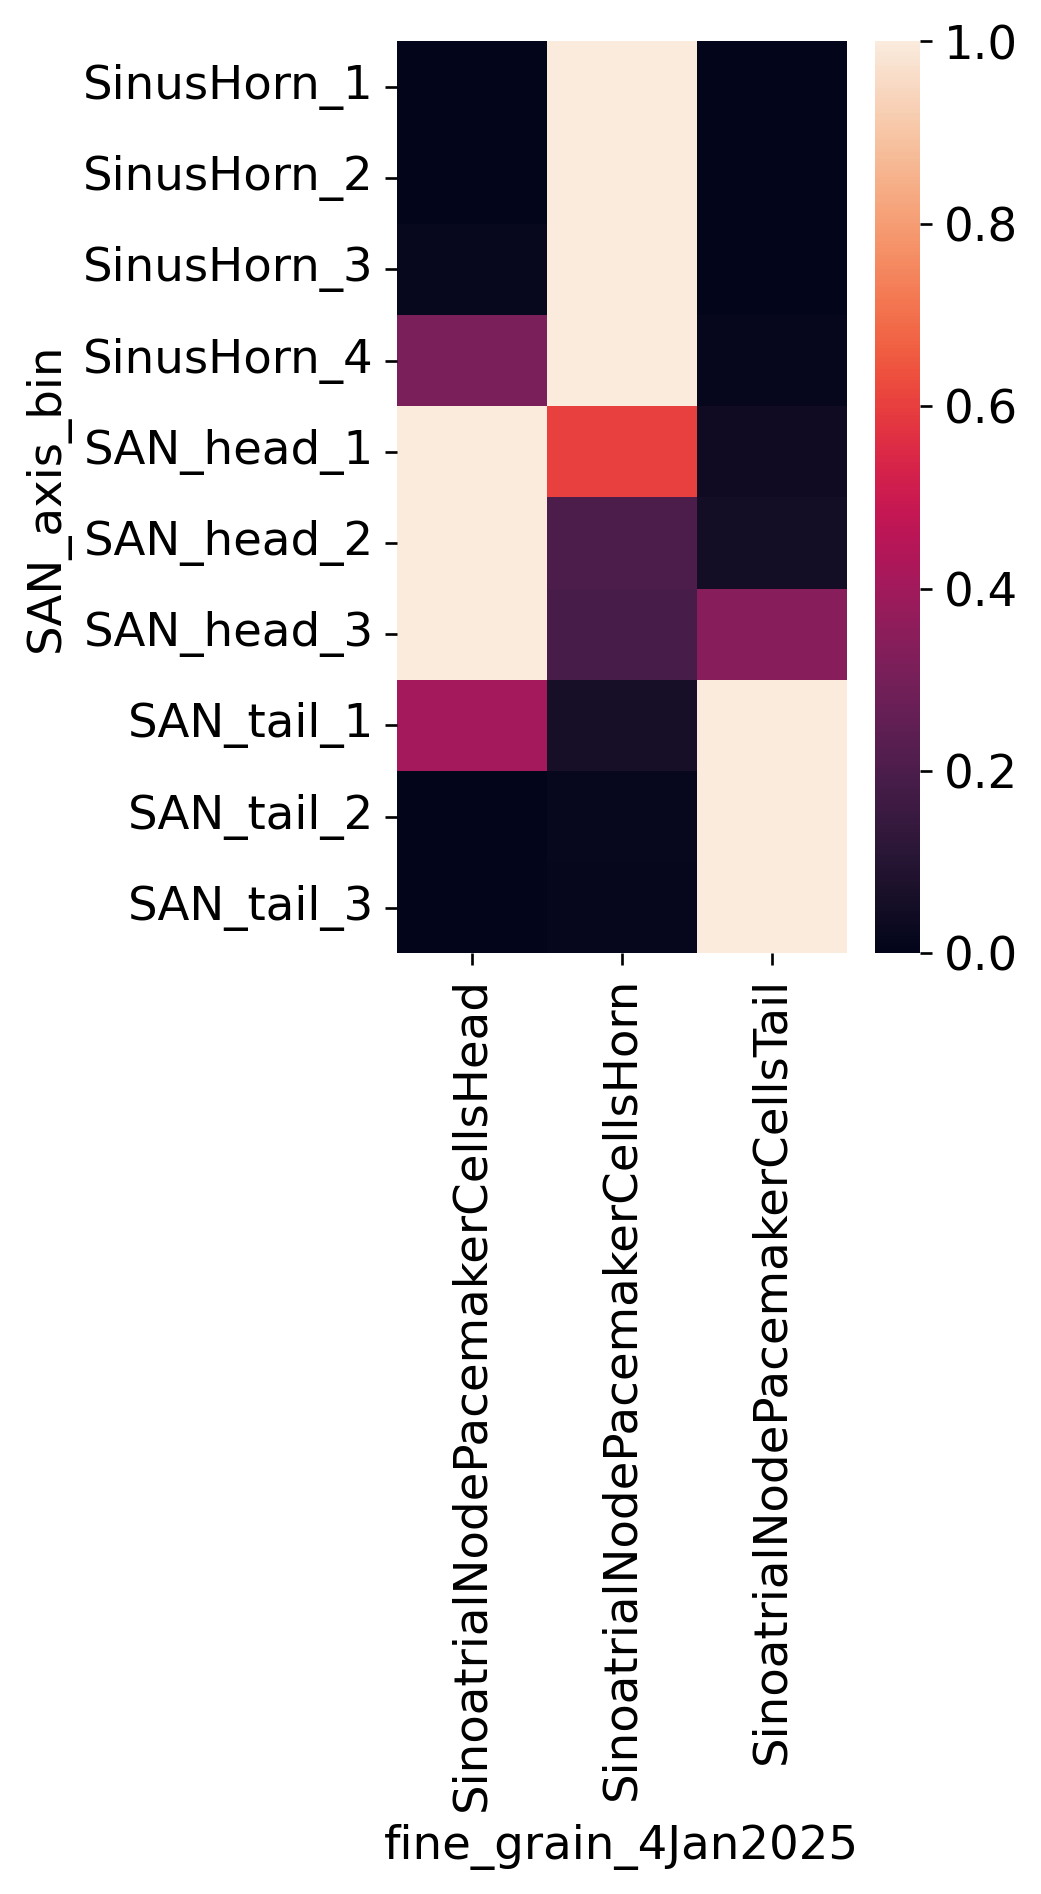

In [18]:
df = bdata.obs[[celltype_key]].copy()
df['count']=1
df.reset_index(inplace=True)
df = pd.pivot_table(df, values='count', index=['index'],
                       columns=[celltype_key])
df.fillna(0,inplace=True)
df[f'{axis_name}_bin']=bdata.obs.loc[df.index,f'{axis_name}_bin_annot']
df = df.groupby(f'{axis_name}_bin').sum()
max_arr = df.max(axis=1)
for col in df.columns:
    df[col] = df[col]/max_arr
plt.rcParams['axes.grid'] = False
plt.rcParams['figure.figsize'] = 3,5
sns.heatmap(df)

In [19]:
# add annotation to original adata
adata.obs[f'{axis_name}_bin_annot'] = 'nan'
adata.obs.loc[bdata.obs_names, f'{axis_name}_bin_annot'] = bdata.obs[f'{axis_name}_bin_annot']
adata.obs[f'{axis_name}_bin_annot'] = adata.obs[f'{axis_name}_bin_annot'].astype('category')
adata.obs[f'{axis_name}_bin_annot'] = adata.obs[f'{axis_name}_bin_annot'].cat.reorder_categories(list(annot_dict.values())+['nan'])
adata.obs[f'{axis_name}_bin_annot'].cat.categories

Index(['SinusHorn_1', 'SinusHorn_2', 'SinusHorn_3', 'SinusHorn_4',
       'SAN_head_1', 'SAN_head_2', 'SAN_head_3', 'SAN_tail_1', 'SAN_tail_2',
       'SAN_tail_3', 'nan'],
      dtype='object')

In [ ]:
# save
adata.obs.drop([f'{axis_name}_bin'],axis=1,inplace=True)
adata.write(f'{adata_dir}/{sample_id}_b2c_cells_filtered_lognorm.h5ad')
adata

# Axon guidance genes

In [20]:
# from embryonic/foetal vs adult comparison
genes = ['SEMA3A', 'SLIT2', 'SLIT3', 'EFNB2', 'CXCL12', 'FGF10', 'VEGFC', 'NELL1']
genes = [x for x in genes if x in bdata.var_names]
print(len(genes))

8


/nfs/team205/kk18/function/python/tissueaxis.py:57: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_gene_exp_prop = df_gene_exp_bi.groupby(f'{axis_col}_binned').mean()
/nfs/team205/kk18/function/python/tissueaxis.py:134: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df_plot.set_index('index').groupby(['variable',f'{axis_col}_binned']).mean().reset_index()


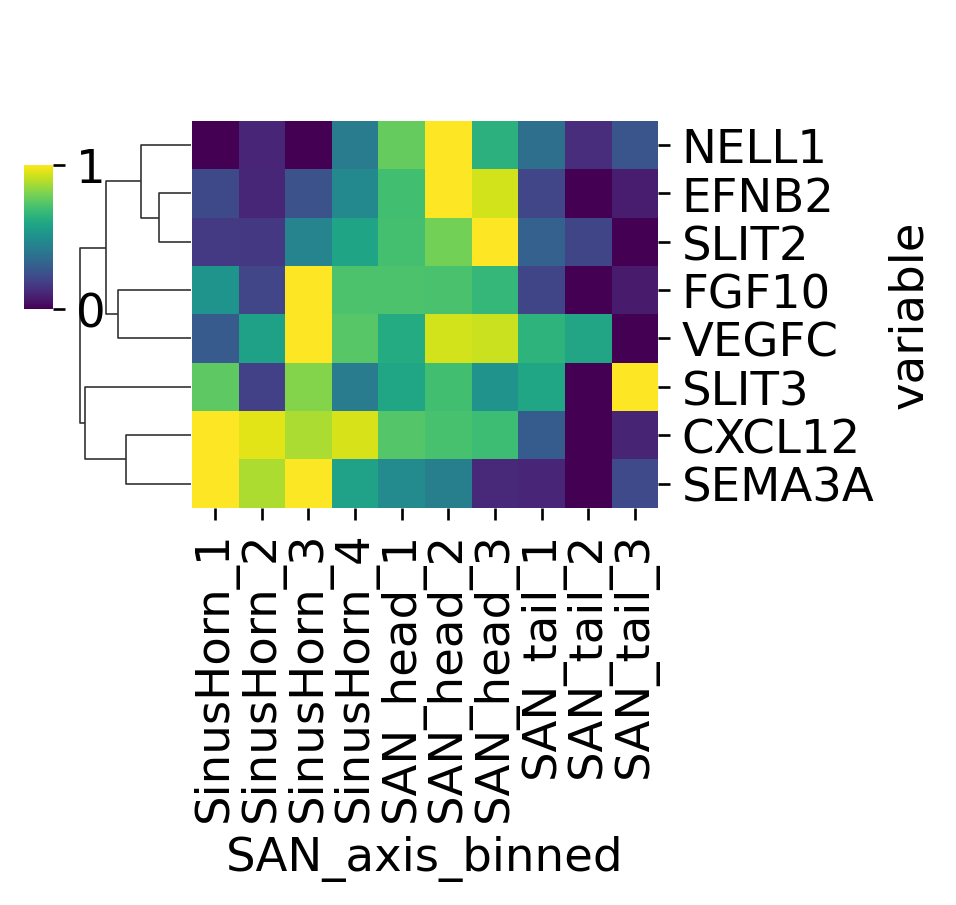

In [22]:
tissueaxis.plot_axis(bdata,
              axis_col=axis_name,
              binned_col=f'{axis_name}_bin_annot',
              feature_type='gene', # 'gene' or 'celltype'
              features_to_plot=genes,
              features_to_remove=None,
              threshold_express_prop=0.1, # at quantile=0.9
              threshold_cell_abundance=None, # at quantile=0.9
              correlation=False,
              min_max_scale=True,
              row_cluster=True,
              figsize=(4,4),
              cbar_pos=(-0, 0.65, 0.03, 0.15),
              cmap='viridis',
          xticklabels=True,
          yticklabels=True,
              title=None,
              return_feature = False,
         save=f'{figdir}/VisiumHD_SANaxis_axon-guidance-genes.pdf',
    save_dpi=300,
             )